<a href="https://colab.research.google.com/github/ae-monterrosa/Data_Analytics/blob/main/P3_Nobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

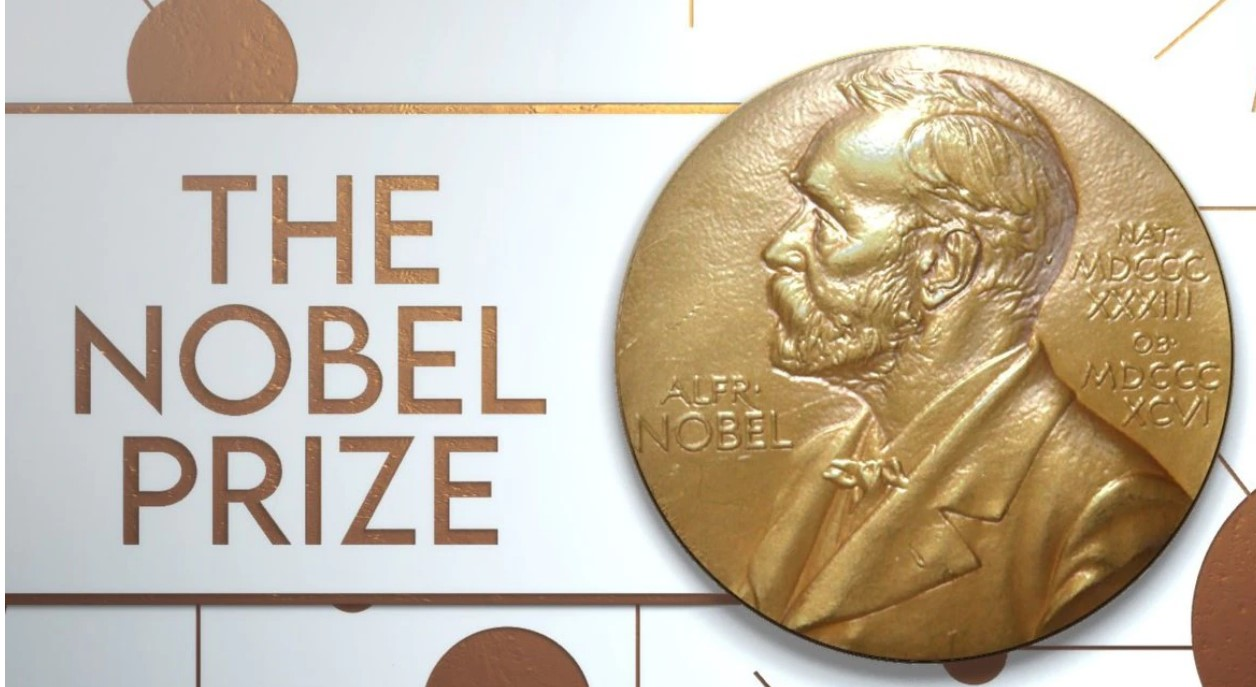

# Are there any biases in the way the Nobel Prizes are awarded?

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

The dataset used in this project is from the Nobel Prize API. This dataset was made available by The Nobel Foundation, collected out of all prize winners from the outset of the awards from 1901 to 2023.

In [2]:
# Loading libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
# Loading DataFrame
nobel_df = pd.read_csv("/content/nobel.csv")

In [5]:
# Exploring DataFrame
nobel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

### 1. What is the most commonly awarded gender and birth country?

In [6]:
# Awards by gender
nobel_gender= nobel_df.sex.value_counts()
print(nobel_gender)
top_gender = "Male"

Male      905
Female     65
Name: sex, dtype: int64


In [7]:
# Awards by birth country
nobel_contries= nobel_df.birth_country.value_counts()
print(nobel_contries)
top_country = "United States of America"

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Austria-Hungary (Ukraine)                         1
Ottoman Empire (Turkey)                           1
Russian Empire (Azerbaijan)                       1
Bosnia (Bosnia and Herzegovina)                   1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64


### 2. What decade had the highest proportion of US-born winners?



In [9]:
# Creating a US-born winners column
nobel_df['us_born']= nobel_df.birth_country == "United States of America"

In [10]:
# Creating a decade column
decade = np.floor(nobel_df.year/10)*10
nobel_df["decade"] = decade.astype(int)

In [21]:
# Finding the proportion
proportion = nobel_df.groupby("decade", as_index=False)["us_born"].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = proportion.max()[0].astype(int)
print(max_decade_usa)


2020


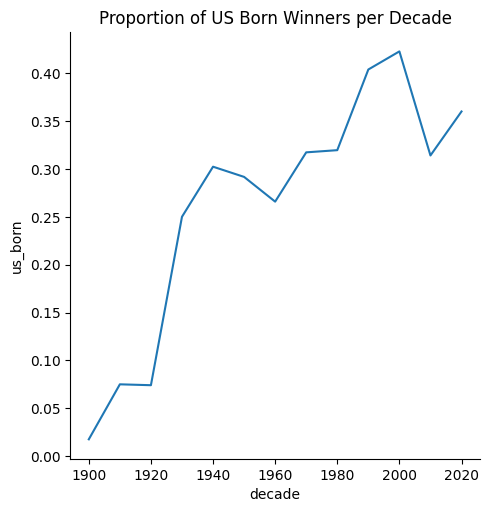

In [22]:
# Creating a relational line plot
sns.relplot(x= 'decade', y='us_born', kind= 'line', data= proportion ).set(title='Proportion of US Born Winners per Decade')

### 3. What decade and category pair had the highest proportion of female laureates?

In [24]:
# Filtering for female winners
nobel_df["female"] = nobel_df.sex == 'Female'

In [25]:
# Grouping by two columns
proportion_f = nobel_df.groupby(["decade", "category"], as_index=False)["female"].mean()

In [29]:
# Finding the decade and category with the highest female winners
max_f = proportion_f[proportion_f.female == proportion_f.female.max()][["decade", "category"]]
max_f

,decade,category
68,2020,Literature


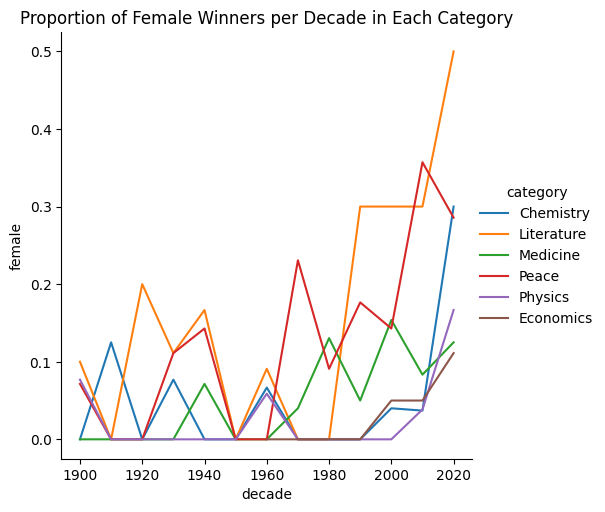

In [28]:
# Creating a relational line plot with multiple categories for visualization
sns.relplot(x= 'decade', y='female', kind= 'line', data= proportion_f, hue= 'category').set(title='Proportion of Female Winners per Decade in Each Category')

### 4. Who was the first woman to receive a Nobel Prize, and in what category?

In [31]:
# Filtering Dataframe for all female winners
all_females = nobel_df[nobel_df["female"]]

In [34]:
# Finding the minimum value in a column
all_females[["year","full_name", "category"]].sort_values('year', ascending=True)

,year,full_name,category
19,1903,"Marie Curie, née Sklodowska",Physics
29,1905,"Baroness Bertha Sophie Felicita von Suttner, n...",Peace
51,1909,Selma Ottilia Lovisa Lagerlöf,Literature
62,1911,"Marie Curie, née Sklodowska",Chemistry
128,1926,Grazia Deledda,Literature
...,...,...,...
982,2022,Annie Ernaux,Literature
993,2023,Anne L’Huillier,Physics
998,2023,Narges Mohammadi,Peace
989,2023,Katalin Karikó,Medicine


In [35]:
first_woman_name = "Marie Curie, née Sklodowska"
first_woman_category = "Physics"

### 5. Which individuals or organizations have won multiple Nobel Prizes throughout the years?

In [36]:
# Counting the values in a column
multiple_wins = nobel_df.full_name.value_counts()

In [37]:
# Finding people with 2 or more wins
multiple_wins[multiple_wins >=2].index

Index(['Comité international de la Croix Rouge (International Committee of the Red Cross)',
       'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger',
       'Marie Curie, née Sklodowska',
       'Office of the United Nations High Commissioner for Refugees (UNHCR)'],
      dtype='object')

In [38]:
# Saving as a list
repeat_list = list(multiple_wins[multiple_wins >=2].index)
print(repeat_list)

['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
